In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('HDSC-StageOneDataset.csv')


In [3]:
data.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   record_id                     29523 non-null  object 
 1   utility_id_ferc1              29523 non-null  int64  
 2   report_year                   29523 non-null  int64  
 3   plant_name_ferc1              29523 non-null  object 
 4   fuel_type_code_pudl           29523 non-null  object 
 5   fuel_unit                     29343 non-null  object 
 6   fuel_qty_burned               29523 non-null  float64
 7   fuel_mmbtu_per_unit           29523 non-null  float64
 8   fuel_cost_per_unit_burned     29523 non-null  float64
 9   fuel_cost_per_unit_delivered  29523 non-null  float64
 10  fuel_cost_per_mmbtu           29523 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 2.5+ MB


In [5]:
data.groupby('fuel_type_code_pudl').mean()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
fuel_type_code_pudl,,,,,,,
coal,115.637534,2004.623143,1.903473e+06,20.762780,67.421830,116.951141,1.787190
gas,124.122062,2005.978060,4.843183e+06,1.021913,13.659397,12.095172,5.408876
nuclear,107.397311,2002.970660,5.454838e+06,17.582120,4955.157002,28616.915039,1.716559
oil,113.236235,2007.195933,6.311677e+04,5.814377,168.877086,313.907691,12.698732
other,110.467066,2001.700599,2.948137e+06,0.572752,18.253856,16.871485,155.084910
waste,154.253968,2005.650794,1.171914e+05,0.341163,19.518122,18.413052,822.709937


In [6]:
data.describe()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.000000,29523.000000,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
mean,118.601836,2005.806050,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,74.178353,7.025483,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,2000.000000,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,122.000000,2006.000000,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,176.000000,2012.000000,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


In [7]:
data.skew()

utility_id_ferc1                  0.605070
report_year                       0.006953
fuel_qty_burned                  15.851495
fuel_mmbtu_per_unit               4.135217
fuel_cost_per_unit_burned        19.787440
fuel_cost_per_unit_delivered    105.014227
fuel_cost_per_mmbtu             171.675535
dtype: float64

In [8]:
from scipy.stats import stats

In [9]:
stats.kurtosis(data['fuel_qty_burned'])

651.2589365474387

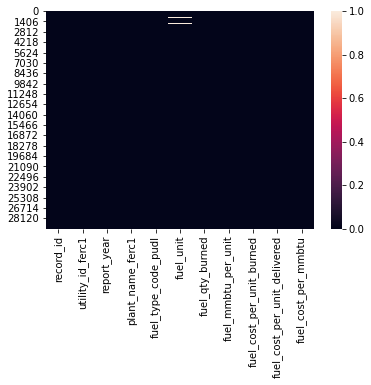

In [14]:
sns.heatmap(data=data.isnull())

In [20]:
data['fuel_unit'].count()

29343

In [23]:
data.corr()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
utility_id_ferc1,1.000000,0.093323,-0.057447,-0.066946,-0.037863,-0.016414,0.006122
report_year,0.093323,1.000000,0.012952,-0.110853,0.013599,-0.014043,0.010261
fuel_qty_burned,-0.057447,0.012952,1.000000,-0.080946,-0.018535,-0.003551,-0.001896
fuel_mmbtu_per_unit,-0.066946,-0.110853,-0.080946,1.000000,-0.010034,-0.009039,-0.005884
fuel_cost_per_unit_burned,-0.037863,0.013599,-0.018535,-0.010034,1.000000,0.011007,-0.000437
fuel_cost_per_unit_delivered,-0.016414,-0.014043,-0.003551,-0.009039,0.011007,1.000000,-0.000109
fuel_cost_per_mmbtu,0.006122,0.010261,-0.001896,-0.005884,-0.000437,-0.000109,1.000000


In [25]:
data[data['fuel_type_code_pudl'] == 'coal'].groupby('report_year').mean()

,utility_id_ferc1,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
report_year,,,,,,
1994,106.168421,1.509912e+06,21.670377,31.546467,124.663939,1.436099
1995,107.854737,2.647153e+06,21.604251,30.677442,28.850834,1.397351
1996,106.078886,1.621465e+06,21.507838,29.454299,28.045432,1.349366
1997,106.124700,1.958999e+06,21.582963,104.897309,27.119043,1.322989
1998,107.663573,2.084013e+06,21.375364,27.616234,716.015659,1.292496
1999,106.178824,2.071836e+06,21.299427,38.361101,34.763268,1.272911
2000,109.853598,2.139080e+06,21.300672,249.203055,173.192467,1.256368
2001,110.831956,2.359316e+06,20.865239,41.622623,39.145055,1.308491
2002,116.240964,2.453120e+06,20.987722,27.623988,26.107316,1.332558


In [26]:
percent_change = ((31.546467 - 27.616234)/31.546467) * 100

In [29]:
 temp = data[data['fuel_type_code_pudl'] == 'coal']

In [32]:
temp[(temp['report_year'] == 1998) | (temp['report_year'] == 1994)]['fuel_cost_per_unit_burned'].pct_change()

0            NaN
1      -0.000538
2       1.137783
3       0.188570
5      -0.062910
          ...   
5708   -0.299797
5710    0.389677
5712    0.073189
5714   -0.378872
5716    0.772355
Name: fuel_cost_per_unit_burned, Length: 906, dtype: float64

In [38]:
data.groupby('report_year').mean()

,utility_id_ferc1,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
report_year,,,,,,
1994,106.120648,2.724018e+06,10.638098,213.191996,63.636060,3.086977
1995,110.139051,3.712067e+06,10.644830,354.422555,32.735269,2.868838
1996,108.714154,2.544754e+06,10.778041,79.434995,9196.705948,2.695880
1997,108.366545,2.813503e+06,10.247632,149.482132,11140.197239,3.113486
1998,109.845528,3.267453e+06,10.704964,126.683519,287.154420,2.775862
1999,108.222857,3.281281e+06,10.558885,120.053605,25.551627,2.740251
2000,111.083758,2.472032e+06,9.224475,237.797111,985.362877,4.208403
2001,113.521386,2.321402e+06,8.371469,133.013010,60.050396,4.612658
2002,120.354357,2.145645e+06,8.304833,101.179365,47.594361,6.226281
